In [1]:
import matplotlib.pyplot as plt
import corner, os, glob, json
import numpy as np
%matplotlib inline

In [2]:
#Reference directory
topdir = os.getcwd()

# Loading directories n'stuff

Open Datasets

In [3]:
#Open dataset with only background, no pulsar red noise
dataset_1b = '/dataset_1b'
#Open dataset with pulsar red noise and background
dataset_2b = '/dataset_2b'
#Open dataset with cw and background
dataset_3b = '/dataset_3b'

#Run with common red noise, no correlation
runname_1b_1 = '/red_noise_no_corr_2'
runname_1b_2 = '/full_run_2'
#Run with common red noise, HD correlation
runname_1b_3 = '/full_run_3'

#Run with common red noise, no correlation
runname_2b_1 = '/red_noise_no_corr_1'

#Run with common red noise, no correlation
runname_3b_1 = '/red_noise_no_corr_1'

#Where the original data is
origdatadir_open_1b = topdir + '/mdc2/group1' + dataset_1b
origdatadir_open_2b = topdir + '/mdc2/group1' + dataset_2b
origdatadir_open_3b = topdir + '/mdc2/group1' + dataset_3b

#Where the dataset files are located
datadir_open_1b = topdir + dataset_1b
datadir_open_2b = topdir + dataset_2b
datadir_open_3b = topdir + dataset_3b

#Where the everything should be saved to (chains, cornerplts, histograms, etc.)
outdir_open_1b_1 = datadir_open_1b + runname_1b_1
outdir_open_1b_2 = datadir_open_1b + runname_1b_2
outdir_open_1b_3 = datadir_open_1b + runname_1b_3
outdir_open_2b_1 = datadir_open_2b + runname_2b_1
outdir_open_3b_1 = datadir_open_3b + runname_3b_1

#param json file with index in chain
paramfile_open_1b_1 = outdir_open_1b_1 + '/Search_params.json'
paramfile_open_1b_2 = outdir_open_1b_2 + '/Search_params.json'
paramfile_open_1b_3 = outdir_open_1b_3 + '/Search_params.json'
paramfile_open_2b_1 = outdir_open_2b_1 + '/Search_params.json'
paramfile_open_3b_1 = outdir_open_3b_1 + '/Search_params.json'

#Where the json noise file for the open dataset is
noisefile = topdir + '/mdc2/group1/challenge1_psr_noise.json'
#Where the truth values for the open datatset are
truthfile = topdir + '/mdc2/group1/group1_gw_parameters.json'

Closed Datasets

In [4]:
#Closed datasets
dataset_1 = '/dataset_1'
dataset_2 = '/dataset_2'
dataset_3= '/dataset_3'
#Runs with common red noise, no correlation
runname_1_1 = '/full_run_1'
#Refit pars
runname_1_2 = '/red_noise_no_corr_1'
#Upperlimit run
runname_1_3 = '/red_noise_no_corr_2'

#No refit
runname_2_1 = '/red_noise_no_corr_1'
#Upperlimit run
runname_2_2 = '/red_noise_no_corr_2'
#Refit pars
runname_2_3 = '/red_noise_no_corr_3'
#With HD correlation
runname_2_4 = '/red_noise_with_corr_1'

#No refit
runname_3_1 = '/full_run_1'
#Refit pars
runname_3_2 = '/red_noise_no_corr_1'
#Upperlimit run
runname_3_3 = '/red_noise_no_corr_2'

#Where the original data is
origdatadir_closed_1 = topdir + '/mdc2/group2' + dataset_1
origdatadir_closed_2 = topdir + '/mdc2/group2' + dataset_2
origdatadir_closed_3 = topdir + '/mdc2/group2' + dataset_3

#Where the dataset files are located
datadir_closed_1 = topdir + dataset_1
datadir_closed_2 = topdir + dataset_2
datadir_closed_3 = topdir + dataset_3

#Where the everything should be saved to (chains, cornerplts, histograms, etc.)
outdir_closed_1_1 = datadir_closed_1 + runname_1_1
outdir_closed_1_2 = datadir_closed_1 + runname_1_2
outdir_closed_1_3 = datadir_closed_1 + runname_1_3

outdir_closed_2_1 = datadir_closed_2 + runname_2_1
outdir_closed_2_2 = datadir_closed_2 + runname_2_2
outdir_closed_2_3 = datadir_closed_2 + runname_2_3
outdir_closed_2_4 = datadir_closed_2 + runname_2_4

outdir_closed_3_1 = datadir_closed_3 + runname_3_1
outdir_closed_3_2 = datadir_closed_3 + runname_3_2
outdir_closed_3_3 = datadir_closed_3 + runname_3_3

#param json file with index in chain
paramfile_closed_1_1 = outdir_closed_1_1 + '/Search_params.json'
paramfile_closed_1_2 = outdir_closed_1_2 + '/Search_params.json'
paramfile_closed_1_3 = outdir_closed_1_3 + '/Search_params.json'

paramfile_closed_2_1 = outdir_closed_2_1 + '/Search_params.json'
paramfile_closed_2_2 = outdir_closed_2_2 + '/Search_params.json'
paramfile_closed_2_3 = outdir_closed_2_3 + '/Search_params.json'
paramfile_closed_2_4 = outdir_closed_2_4 + '/Search_params.json'

paramfile_closed_3_1 = outdir_closed_3_1 + '/Search_params.json'
paramfile_closed_3_2 = outdir_closed_3_2 + '/Search_params.json'
paramfile_closed_3_3 = outdir_closed_3_3 + '/Search_params.json'

# Load chains

Open Datasets

In [5]:
#Load chains for open dataset 1b 
chain_open_1b_1 = np.loadtxt(outdir_open_1b_1 + '/chain_1.txt')
burn_open_1b_1 = int(0.25 * chain_open_1b_1.shape[0])
chain_open_1b_2 = np.loadtxt(outdir_open_1b_2 + '/chain_1.txt')
burn_open_1b_2 = int(0.25 * chain_open_1b_2.shape[0])
chain_open_1b_3 = np.loadtxt(outdir_open_1b_3 + '/chain_1.txt')
burn_open_1b_3 = int(0.25 * chain_open_1b_3.shape[0])

In [6]:
#Load chains for open dataset 2b
chain_open_2b_1 = np.loadtxt(outdir_open_2b_1 + '/chain_1.txt')
burn_open_2b_1 = int(0.25 * chain_open_2b_1.shape[0])

In [7]:
#Load chains for open dataset 3b
chain_open_3b_1 = np.loadtxt(outdir_open_3b_1 + '/chain_1.txt')
burn_open_3b_1 = int(0.25 * chain_open_3b_1.shape[0])

Closed Datasets

In [8]:
#Load chains for closed dataset 1
chain_closed_1_1 = np.loadtxt(outdir_closed_1_1 + '/chain_1.txt')
burn_closed_1_1 = int(0.25 * chain_closed_1_1.shape[0])
chain_closed_1_2 = np.loadtxt(outdir_closed_1_2 + '/chain_1.txt')
burn_closed_1_2 = int(0.25 * chain_closed_1_2.shape[0])
chain_closed_1_3 = np.loadtxt(outdir_closed_1_3 + '/chain_1.txt')
burn_closed_1_3 = int(0.25 * chain_closed_1_3.shape[0])

In [9]:
#Load chains for closed dataset 2
chain_closed_2_1 = np.loadtxt(outdir_closed_2_1 + '/chain_1.txt')
burn_closed_2_1 = int(0.25 * chain_closed_2_1.shape[0])
chain_closed_2_2 = np.loadtxt(outdir_closed_2_2 + '/chain_1.txt')
burn_closed_2_2 = int(0.25 * chain_closed_2_2.shape[0])
chain_closed_2_3 = np.loadtxt(outdir_closed_2_3 + '/chain_1.txt')
burn_closed_2_3 = int(0.25 * chain_closed_2_3.shape[0])
chain_closed_2_4 = np.loadtxt(outdir_closed_2_4 + '/chain_1.txt')
burn_closed_2_4 = int(0.25 * chain_closed_2_4.shape[0])

In [10]:
#Load chains for closed dataset 3
chain_closed_3_1 = np.loadtxt(outdir_closed_3_1 + '/chain_1.txt')
burn_closed_3_1 = int(0.25 * chain_closed_3_1.shape[0])
chain_closed_3_2 = np.loadtxt(outdir_closed_3_2 + '/chain_1.txt')
burn_closed_3_2 = int(0.25 * chain_closed_3_2.shape[0])
chain_closed_3_3 = np.loadtxt(outdir_closed_3_3 + '/chain_1.txt')
burn_closed_3_3 = int(0.25 * chain_closed_3_3.shape[0])

# Load param files to iterate through pulsars in pta

Open Datasets

In [11]:
#Load param files to iterate through pulsars in pta
#1b
with open(paramfile_open_1b_1) as pf:
    param_dict_open_1b_1 = json.load(pf)
    pf.close()
with open(paramfile_open_1b_2) as pf:
    param_dict_open_1b_2 = json.load(pf)
    pf.close()
with open(paramfile_open_1b_3) as pf:
    param_dict_open_1b_3 = json.load(pf)
    pf.close()
#2b
with open(paramfile_open_2b_1) as pf:
    param_dict_open_2b_1 = json.load(pf)
    pf.close()  
#3b
with open(paramfile_open_3b_1) as pf:
    param_dict_open_3b_1 = json.load(pf)
    pf.close()

#Load truth values for open dataset
with open(truthfile) as tf:
    truths = json.load(tf)
    tf.close()

Closed Datasets

In [12]:
#Load param files to iterate through pulsars in pta
#1
with open(paramfile_closed_1_1) as pf:
    param_dict_closed_1_1 = json.load(pf)
    pf.close()
with open(paramfile_closed_1_2) as pf:
    param_dict_closed_1_2 = json.load(pf)
    pf.close()
with open(paramfile_closed_1_3) as pf:
    param_dict_closed_1_3 = json.load(pf)
    pf.close()
#2
with open(paramfile_closed_2_1) as pf:
    param_dict_closed_2_1 = json.load(pf)
    pf.close()
with open(paramfile_closed_2_2) as pf:
    param_dict_closed_2_2 = json.load(pf)
    pf.close()
with open(paramfile_closed_2_3) as pf:
    param_dict_closed_2_3 = json.load(pf)
    pf.close()
with open(paramfile_closed_2_4) as pf:
    param_dict_closed_2_4 = json.load(pf)
    pf.close()
#3
with open(paramfile_closed_3_1) as pf:
    param_dict_closed_3_1 = json.load(pf)
    pf.close()
with open(paramfile_closed_3_2) as pf:
    param_dict_closed_3_2 = json.load(pf)
    pf.close()
with open(paramfile_closed_3_3) as pf:
    param_dict_closed_3_3 = json.load(pf)
    pf.close()


# Fun corner plots for individual pulsars from whichever dataset

In [13]:
#Looking at all noise parameters for a particular pulsar
psrs = []
for psr in param_dict_open_1b_2.keys():
    psrs.append(psr)

plot_psr = 'J1909-3744'
#plot_psr = psrs[-1]

print('Looking at pulsar ' + plot_psr)

psr_noise_names = []
psr_noise_idx = []

if plot_psr in param_dict_open_1b_2:
    for psr, params in param_dict_open_1b_2.items():
        if psr == plot_psr:
            for param_names, param_idx in params.items():
                psr_noise_names.append(param_names)
                psr_noise_idx.append(param_idx)
else:
    print('That pulsar is not in the pta.')

Looking at pulsar J1909-3744


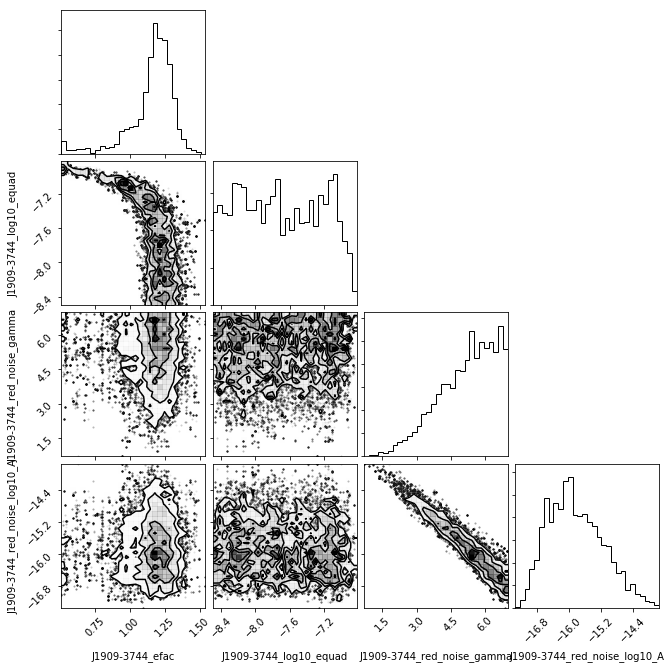

In [14]:
#pulsar corner plot
corner.corner(chain_open_1b_2[burn_open_1b_2:,psr_noise_idx], 30, labels=psr_noise_names);
plt.show()
#Plot and save corner plots
#plt.savefig(outdir + runname + '_cornerplt.png')
#plt.close()

# Load parameter details for parameters of interest

In [14]:
#Pulsar parameters we want to look at
param_of_interests = ['red_noise_log10_A','red_noise_gamma']

Open Datasets

In [15]:
#Open 1b
#Look at all of one parameter in open_1b_1 run
psr_param_names_open_1b_1 = []
psr_param_idx_open_1b_1 = []

for psr, params in param_dict_open_1b_1.items():
    for param_of_interest in param_of_interests:
        for param_names, param_idx in params.items():
            if param_names.endswith(param_of_interest):
                psr_param_names_open_1b_1.append(param_names)
                psr_param_idx_open_1b_1.append(param_idx)
                
#Look at all of one parameter in open_1b_2 run
psr_param_names_open_1b_2 = []
psr_param_idx_open_1b_2 = []

for psr, params in param_dict_open_1b_2.items():
    for param_of_interest in param_of_interests:
        for param_names, param_idx in params.items():
            if param_names.endswith(param_of_interest):
                psr_param_names_open_1b_2.append(param_names)
                psr_param_idx_open_1b_2.append(param_idx)

#Look at all of one parameter in open_1b_3 run
psr_param_names_open_1b_3 = []
psr_param_idx_open_1b_3 = []

for psr, params in param_dict_open_1b_3.items():
    for param_of_interest in param_of_interests:
        for param_names, param_idx in params.items():
            if param_names.endswith(param_of_interest):
                psr_param_names_open_1b_3.append(param_names)
                psr_param_idx_open_1b_3.append(param_idx)

In [16]:
#Open 2b
#Look at all of one parameter in open_2b_1 run
psr_param_names_open_2b_1 = []
psr_param_idx_open_2b_1 = []

for psr, params in param_dict_open_2b_1.items():
    for param_of_interest in param_of_interests:
        for param_names, param_idx in params.items():
            if param_names.endswith(param_of_interest):
                psr_param_names_open_2b_1.append(param_names)
                psr_param_idx_open_2b_1.append(param_idx)

In [17]:
#Open 3b
#Look at all of one parameter in open_3b_1 run
psr_param_names_open_3b_1 = []
psr_param_idx_open_3b_1 = []

for psr, params in param_dict_open_3b_1.items():
    for param_of_interest in param_of_interests:
        for param_names, param_idx in params.items():
            if param_names.endswith(param_of_interest):
                psr_param_names_open_3b_1.append(param_names)
                psr_param_idx_open_3b_1.append(param_idx)

Closed Datasets

In [18]:
#Closed 1
#Look at all of one parameter in closed_1_1 run
psr_param_names_closed_1_1 = []
psr_param_idx_closed_1_1 = []

for psr, params in param_dict_closed_1_1.items():
    for param_of_interest in param_of_interests:
        for param_names, param_idx in params.items():
            if param_names.endswith(param_of_interest):
                psr_param_names_closed_1_1.append(param_names)
                psr_param_idx_closed_1_1.append(param_idx)
                
#Look at all of one parameter in closed_1_2 run
psr_param_names_closed_1_2 = []
psr_param_idx_closed_1_2 = []

for psr, params in param_dict_closed_1_2.items():
    for param_of_interest in param_of_interests:
        for param_names, param_idx in params.items():
            if param_names.endswith(param_of_interest):
                psr_param_names_closed_1_2.append(param_names)
                psr_param_idx_closed_1_2.append(param_idx)
                
#Look at all of one parameter in closed_1_3 run
psr_param_names_closed_1_3 = []
psr_param_idx_closed_1_3 = []

for psr, params in param_dict_closed_1_3.items():
    for param_of_interest in param_of_interests:
        for param_names, param_idx in params.items():
            if param_names.endswith(param_of_interest):
                psr_param_names_closed_1_3.append(param_names)
                psr_param_idx_closed_1_3.append(param_idx)

In [19]:
#Closed 2
#Look at all of one parameter in closed_2_1 run
psr_param_names_closed_2_1 = []
psr_param_idx_closed_2_1 = []

for psr, params in param_dict_closed_2_1.items():
    for param_of_interest in param_of_interests:
        for param_names, param_idx in params.items():
            if param_names.endswith(param_of_interest):
                psr_param_names_closed_2_1.append(param_names)
                psr_param_idx_closed_2_1.append(param_idx)
            
#Look at all of one parameter in closed_2_2 run
psr_param_names_closed_2_2 = []
psr_param_idx_closed_2_2 = []

for psr, params in param_dict_closed_2_2.items():
    for param_of_interest in param_of_interests:
        for param_names, param_idx in params.items():
            if param_names.endswith(param_of_interest):
                psr_param_names_closed_2_2.append(param_names)
                psr_param_idx_closed_2_2.append(param_idx)

#Look at all of one parameter in closed_2_3 run
psr_param_names_closed_2_3 = []
psr_param_idx_closed_2_3 = []

for psr, params in param_dict_closed_2_3.items():
    for param_of_interest in param_of_interests:
        for param_names, param_idx in params.items():
            if param_names.endswith(param_of_interest):
                psr_param_names_closed_2_3.append(param_names)
                psr_param_idx_closed_2_3.append(param_idx)
    
#Look at all of one parameter in closed_2_3 run
psr_param_names_closed_2_4 = []
psr_param_idx_closed_2_4 = []

for psr, params in param_dict_closed_2_4.items():
    for param_of_interest in param_of_interests:
        for param_names, param_idx in params.items():
            if param_names.endswith(param_of_interest):
                psr_param_names_closed_2_4.append(param_names)
                psr_param_idx_closed_2_4.append(param_idx)

In [20]:
#Closed 3
#Look at all of one parameter in closed_3_1 run
psr_param_names_closed_3_1 = []
psr_param_idx_closed_3_1 = []

for psr, params in param_dict_closed_3_1.items():
    for param_of_interest in param_of_interests:
        for param_names, param_idx in params.items():
            if param_names.endswith(param_of_interest):
                psr_param_names_closed_3_1.append(param_names)
                psr_param_idx_closed_3_1.append(param_idx)
                
#Look at all of one parameter in closed_3_2 run
psr_param_names_closed_3_2 = []
psr_param_idx_closed_3_2 = []

for psr, params in param_dict_closed_3_2.items():
    for param_of_interest in param_of_interests:
        for param_names, param_idx in params.items():
            if param_names.endswith(param_of_interest):
                psr_param_names_closed_3_2.append(param_names)
                psr_param_idx_closed_3_2.append(param_idx)
                
#Look at all of one parameter in closed_3_3 run
psr_param_names_closed_3_3 = []
psr_param_idx_closed_3_3 = []

for psr, params in param_dict_closed_3_3.items():
    for param_of_interest in param_of_interests:
        for param_names, param_idx in params.items():
            if param_names.endswith(param_of_interest):
                psr_param_names_closed_3_3.append(param_names)
                psr_param_idx_closed_3_3.append(param_idx)

# Display individual pulsar histograms from all runs

In [21]:
#display all histograms for particular parameter (ie. red_noise_log10_A)
def draw_histograms(data, labels, indices):
    n_cols = 4
    n_rows = int(len(labels)/n_cols)
    n_bins = 50
    fig,axarr =plt.subplots(nrows=n_rows,ncols=n_cols,figsize=(20,55))
    ii = 0
    for i in range(n_rows):
        for j in range(n_cols):
            axarr[i][j].hist(data[:,indices[ii]],bins=n_bins, density=True,histtype = 'step')
            axarr[i][j].set_xlabel(labels[ii])
            ii += 1
    fig.tight_layout()
    plt.show()

Open Datasets

In [22]:
#display all histograms for open_1b_1 run
#draw_histograms(chain_open_1b_1[burn_open_1b_1:,:],\
#                psr_param_names_open_1b_1,psr_param_idx_open_1b_1)

In [23]:
#display all histograms for open_1b_2 run
#draw_histograms(chain_open_1b_2[burn_open_1b_2:,:],\
#                psr_param_names_open_1b_2,psr_param_idx_open_1b_2)

In [24]:
#display all histograms for open_1b_3 run
#draw_histograms(chain_open_1b_3[burn_open_1b_3:,:],\
#                psr_param_names_open_1b_3,psr_param_idx_open_1b_3)

In [25]:
#display all histograms for open_2b_1 run
#draw_histograms(chain_open_2b_1[burn_open_2b_1:,:],\
#                psr_param_names_open_2b_1,psr_param_idx_open_2b_1)

In [26]:
#display all histograms for open_3b_1 run
#draw_histograms(chain_open_3b_1[burn_open_3b_1:,:],\
#                psr_param_names_open_3b_1,psr_param_idx_open_3b_1)

In [27]:
#display all histograms for closed_1_1 run
#draw_histograms(chain_closed_1_1[burn_closed_1_1:,:],\
#                psr_param_names_closed_1_1,psr_param_idx_closed_1_1)

In [29]:
#display all histograms for closed_1_2 run
#draw_histograms(chain_closed_1_2[burn_closed_1_2:,:],\
#                psr_param_names_closed_1_2,psr_param_idx_closed_1_2)

In [30]:
#display all histograms for closed_2_1 run
#draw_histograms(chain_closed_2_1[burn_closed_2_1:,:],\
#                psr_param_names_closed_2_1,psr_param_idx_closed_2_1)

In [31]:
#display all histograms for closed_2_2 run
#draw_histograms(chain_closed_2_2[burn_closed_2_2:,:],\
#                psr_param_names_closed_2_2,psr_param_idx_closed_2_2)

In [33]:
#display all histograms for closed_3_1 run
#draw_histograms(chain_closed_3_1[burn_closed_3_1:,:],\
#                psr_param_names_closed_3_1,psr_param_idx_closed_3_1)

In [34]:
#display all histograms for closed_3_2 run
#draw_histograms(chain_closed_3_2[burn_closed_3_2:,:],\
#                psr_param_names_closed_3_2,psr_param_idx_closed_3_2)

In [22]:
truth_params_1b = []
truth_vals_1b = []
truth_params_2b = []
truth_vals_2b = []
truth_params_3b = []
truth_vals_3b = []

for dataset, info in truths.items():
    for truth_params, truth_vals in info.items():
        if dataset == 'dataset1':
            truth_params_1b.append(truth_params)
            truth_vals_1b.append(truth_vals)
        if dataset == 'dataset2':
            truth_params_2b.append(truth_params)
            truth_vals_2b.append(truth_vals)
        if dataset == 'dataset3':
            truth_params_3b.append(truth_params)
            truth_vals_3b.append(truth_vals)

# GW search histograms

In [23]:
def Getupperlimit(height,bins,upper_limit):
    integral = 0.0
    i = 0
    for i in range(len(bins)-1):
        bin_width = bins[i+1] - bins[i]
        integral += bin_width*height[i]
        if integral < upper_limit:
            upper_limit_A = bins[i+1]
    return upper_limit_A

In [28]:
def Bayes_fac(samples, ntol = 200, logAmin = -20, logAmax = -12):
    """
    TAKEN FROM ENTERPRISE EXTENSIONS
    Computes the Savage Dickey Bayes Factor and uncertainty.
    :param samples: MCMC samples of GWB (or common red noise) amplitude
    :param ntol: Tolerance on number of samples in bin
    :returns: (bayes factor, 1-sigma bayes factor uncertainty)
    """

    prior = 1 / (logAmax - logAmin)
    dA = np.linspace(0.01, 0.1, 100)
    bf = []
    bf_err = []
    mask = [] # selecting bins with more than 200 samples

    for ii,delta in enumerate(dA):
        n = np.sum(samples <= (logAmin + delta))
        N = len(samples)

        post = n / N / delta

        bf.append(prior/post)
        bf_err.append(bf[ii]/np.sqrt(n))

        if n > ntol:
            mask.append(ii)

    return np.mean(np.array(bf)[mask]), np.std(np.array(bf)[mask])


In [25]:
#parameters for gw search and histogram display
index_from_eof = -5
n_bins = 50
upper_limit = .95
textsize = 12
pars = ['gamma_gw','log10_A_gw','Log Likelihood?','Log Likelihood?','acceptance rate','Something']

Open Datasets

/home/andrew/anaconda3/envs/enterprise/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2920: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/andrew/anaconda3/envs/enterprise/lib/python3.6/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/andrew/anaconda3/envs/enterprise/lib/python3.6/site-packages/numpy/core/_methods.py:140: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/home/andrew/anaconda3/envs/enterprise/lib/python3.6/site-packages/numpy/core/_methods.py:110: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/home/andrew/anaconda3/envs/enterprise/lib/python3.6/site-packages/numpy/core/_methods.py:132: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


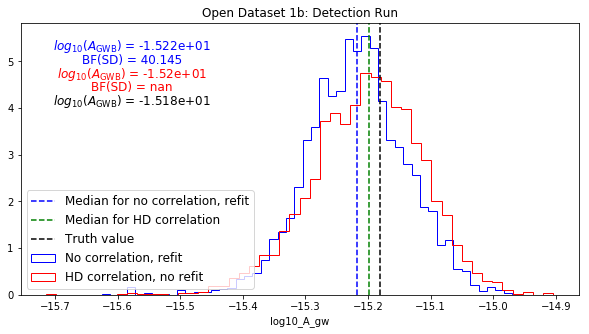

In [57]:
#Plot detection histogram on gwb for open dataset 1b
log = True
plt.figure(figsize=(10,5))
plt.title('Open Dataset 1b: Detection Run')

if log == False:
    plt_chain_open_1b_1 = 10**chain_open_1b_1[burn_open_1b_1:,index_from_eof]
    plt_chain_open_1b_3 = 10**chain_open_1b_3[burn_open_1b_3:,index_from_eof]
    truth_val_gwb_1b = 10**truth_vals_1b[0]
    Amp_1b_1 = r'$\rm A_{GWB}$ = '
    Amp_1b_3 = r'$\rm A_{GWB}$ = '
    Amp_1b_truth = r'$\rm A_{GWB}$ = '
else:
    plt_chain_open_1b_1 = chain_open_1b_1[burn_open_1b_1:,index_from_eof]
    plt_chain_open_1b_3 = chain_open_1b_3[burn_open_1b_3:,index_from_eof]
    truth_val_gwb_1b = truth_vals_1b[0]
    Amp_1b_1 = r'$log_{10}(A_{\rm GWB})$ = '
    Amp_1b_3 = r'$log_{10}(A_{\rm GWB})$ = '
    Amp_1b_truth = r'$log_{10}(A_{\rm GWB})$ = '

#Get median of GWB histogram
gwb_med_open_1b_1 = np.median(plt_chain_open_1b_1)
gwb_med_open_1b_3 = np.median(plt_chain_open_1b_3)
#Get avg of GWB histogram
gwb_mean_open_1b_1 = np.mean(plt_chain_open_1b_1)
gwb_mean_open_1b_3 = np.mean(plt_chain_open_1b_3)
#Get std dev of GWB histogram
gwb_sigma_open_1b_1 = np.std(plt_chain_open_1b_1)
gwb_sigma_open_1b_3 = np.std(plt_chain_open_1b_3)
#Get Bayes' Factor of run
Bae_1b_1 = Bayes_fac(plt_chain_open_1b_1, ntol = 200, logAmin = min(plt_chain_open_1b_1), logAmax = max(plt_chain_open_1b_1))
Bae_1b_3 = Bayes_fac(plt_chain_open_1b_3, ntol = 200, logAmin = min(plt_chain_open_1b_3), logAmax = max(plt_chain_open_1b_3))
#plot text
Amp_1b_1 = Amp_1b_1 + str(np.format_float_scientific(gwb_med_open_1b_1,precision = 3))
Amp_1b_3 = Amp_1b_3 + str(np.format_float_scientific(gwb_med_open_1b_3,precision = 3))
Amp_1b_truth = Amp_1b_truth + str(np.format_float_scientific(truth_val_gwb_1b,precision = 3))
Bae_txt_1b_1 = 'BF(SD) = ' + str(round(Bae_1b_1[0],3))
Bae_txt_1b_3 = 'BF(SD) = ' + str(round(Bae_1b_3[0],3))

plt.hist(plt_chain_open_1b_1, bins = n_bins, density = True,histtype = 'step',label = 'No correlation, refit',color='b')
plt.hist(plt_chain_open_1b_3, bins = n_bins, density = True,histtype = 'step',label = 'HD correlation, no refit',color='r')
plt.axvline(x=gwb_med_open_1b_1, linestyle = '--', color = 'b', label = 'Median for no correlation, refit')
plt.axvline(x=gwb_med_open_1b_3, linestyle = '--', color = 'g', label = 'Median for HD correlation')
plt.axvline(x=truth_val_gwb_1b, linestyle = '--', color = 'k', label = 'Truth value')
#plt.axvspan(gwb_mean_open_1b_1-gwb_sigma_open_1b_1, gwb_mean_open_1b_1+gwb_sigma_open_1b_1, alpha=0.25, color='b')
#plt.axvspan(gwb_mean_open_1b_3-gwb_sigma_open_1b_3, gwb_mean_open_1b_3+gwb_sigma_open_1b_3, alpha=0.25, color='r')
plt.text(x = .2,y = .9,s=Amp_1b_1,transform=plt.gca().transAxes,fontsize = textsize, horizontalalignment='center', color = 'b')
plt.text(x = .2,y = .8,s=Amp_1b_3,transform=plt.gca().transAxes,fontsize = textsize, horizontalalignment='center', color = 'r')
plt.text(x = .2,y = .7,s=Amp_1b_truth,transform=plt.gca().transAxes,fontsize = textsize, horizontalalignment='center', color = 'k')
plt.text(x = .2,y = .85,s=Bae_txt_1b_1,transform=plt.gca().transAxes,fontsize = textsize, horizontalalignment='center', color = 'b')
plt.text(x = .2,y = .75,s=Bae_txt_1b_3,transform=plt.gca().transAxes,fontsize = textsize, horizontalalignment='center', color = 'r')
plt.xlabel(pars[index_from_eof])
plt.legend(loc = 'lower left',prop={'size': textsize})
plt.show()
#plt.close()

/home/andrew/anaconda3/envs/enterprise/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2920: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/andrew/anaconda3/envs/enterprise/lib/python3.6/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/andrew/anaconda3/envs/enterprise/lib/python3.6/site-packages/numpy/core/_methods.py:140: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/home/andrew/anaconda3/envs/enterprise/lib/python3.6/site-packages/numpy/core/_methods.py:110: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/home/andrew/anaconda3/envs/enterprise/lib/python3.6/site-packages/numpy/core/_methods.py:132: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


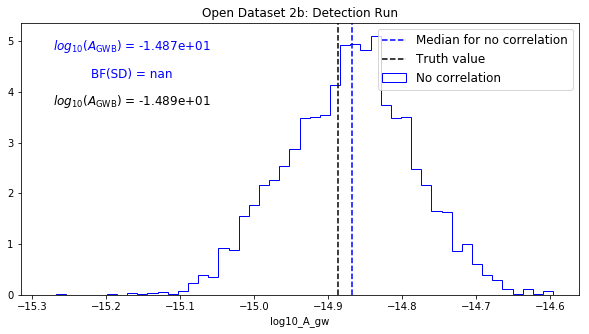

In [56]:
#Plot detection histogram on gwb for open dataset 2b
log = True
plt.figure(figsize=(10,5))
plt.title('Open Dataset 2b: Detection Run')

if log == False:
    plt_chain_open_2b_1 = 10**chain_open_2b_1[burn_open_2b_1:,index_from_eof]
    truth_val_gwb_2b = 10**truth_vals_2b[0]
    Amp_2b_1 = r'$\rm A_{GWB}$ = '
    Amp_2b_truth = r'$\rm A_{GWB}$ = '
else:
    plt_chain_open_2b_1 = chain_open_2b_1[burn_open_2b_1:,index_from_eof]
    truth_val_gwb_2b = truth_vals_2b[0]
    Amp_2b_1 = r'$log_{10}(A_{\rm GWB})$ = '
    Amp_2b_truth = r'$log_{10}(A_{\rm GWB})$ = '

#Get median of GWB histogram
gwb_med_open_2b_1 = np.median(plt_chain_open_2b_1)
#Get avg and std dev of GWB histogram
gwb_mean_open_2b_1 = np.mean(plt_chain_open_2b_1)
gwb_sigma_open_2b_1 = np.std(plt_chain_open_2b_1)
#Get Bayes' Factor of run
Bae_2b_1 = Bayes_fac(plt_chain_open_2b_1, ntol = 200, logAmin = min(plt_chain_open_2b_1), logAmax = max(plt_chain_open_2b_1))
#plot text
Amp_2b_1 = Amp_2b_1 + str(np.format_float_scientific(gwb_med_open_2b_1,precision = 3))
Amp_2b_truth = Amp_2b_truth + str(np.format_float_scientific(truth_val_gwb_2b,precision = 3))
Bae_txt_2b_1 = 'BF(SD) = ' + str(round(Bae_2b_1[0],3))
    
plt.hist(plt_chain_open_2b_1, bins = n_bins, density = True,histtype = 'step',label = 'No correlation',color='b')
plt.axvline(x=gwb_med_open_2b_1, linestyle = '--', color = 'b', label = 'Median for no correlation')
plt.axvline(x=truth_val_gwb_2b, linestyle = '--', color = 'k', label = 'Truth value')
#plt.axvspan(gwb_mean_open_2b_1-gwb_sigma_open_2b_1, gwb_mean_open_2b_1+gwb_sigma_open_2b_1, alpha=0.25, color='b')
plt.text(x = .2,y = .9,s=Amp_2b_1,transform=plt.gca().transAxes,fontsize = textsize, horizontalalignment='center', color = 'b')
plt.text(x = .2,y = .7,s=Amp_2b_truth,transform=plt.gca().transAxes,fontsize = textsize, horizontalalignment='center', color = 'k')
plt.text(x = .2,y = .8,s=Bae_txt_2b_1,transform=plt.gca().transAxes,fontsize = textsize, horizontalalignment='center', color = 'b')
plt.xlabel(pars[index_from_eof])
plt.legend(loc = 'upper right',prop={'size': textsize})
plt.show()

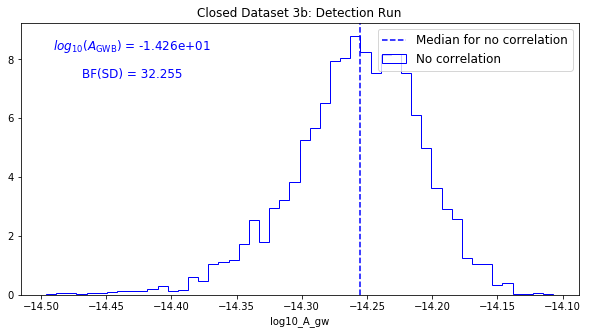

In [55]:
#Plot detection histogram on gwb for open dataset 3b
log = True
plt.figure(figsize=(10,5))
plt.title('Closed Dataset 3b: Detection Run')

if log == False:
    plt_chain_open_3b_1 = 10**chain_open_3b_1[burn_open_3b_1:,index_from_eof]
    #truth_val_gwb_3b = 10**truth_vals_3b[0]
    Amp_3b_1 = r'$\rm A_{GWB}$ = '
    Amp_3b_truth = r'$\rm A_{GWB}$ = '
else:
    plt_chain_open_3b_1 = chain_open_3b_1[burn_open_3b_1:,index_from_eof]
    #truth_val_gwb_3b = truth_vals_3b[0]
    Amp_3b_1 = r'$log_{10}(A_{\rm GWB})$ = '
    Amp_3b_truth = r'$log_{10}(A_{\rm GWB})$ = '

#Get median of GWB histogram
gwb_med_open_3b_1 = np.median(plt_chain_open_3b_1)
#Get avg and std dev of GWB histogram
gwb_mean_open_3b_1 = np.mean(plt_chain_open_3b_1)
gwb_sigma_open_3b_1 = np.std(plt_chain_open_3b_1)
#Get Bayes' Factor of run
Bae_3b_1 =Bayes_fac(plt_chain_open_3b_1, ntol = 200, logAmin = min(plt_chain_open_3b_1), logAmax = max(plt_chain_open_3b_1))
#plot text
Amp_3b_1 = Amp_3b_1 + str(np.format_float_scientific(gwb_med_open_3b_1,precision = 3))
Bae_txt_3b_1 = 'BF(SD) = ' + str(round(Bae_3b_1[0],3))
    
plt.hist(plt_chain_open_3b_1, bins = n_bins, density = True,histtype = 'step',label = 'No correlation',color='b')
plt.axvline(x=gwb_med_open_3b_1, linestyle = '--', color = 'b', label = 'Median for no correlation')
#plt.axvline(x=truth_val_gwb_3b, linestyle = '--', color = 'k', label = 'Truth value')
#plt.axvspan(gwb_mean_open_3b_1-gwb_sigma_open_3b_1, gwb_mean_open_3b_1+gwb_sigma_open_3b_1, alpha=0.25, color='b')
plt.text(x = .2,y = .9,s=Amp_3b_1,transform=plt.gca().transAxes,fontsize = textsize, horizontalalignment='center', color = 'b')
#plt.text(x = .2,y = .7,s=Amp_3b_truth,transform=plt.gca().transAxes,fontsize = textsize, horizontalalignment='center', color = 'r')
plt.text(x = .2,y = .8,s=Bae_txt_3b_1,transform=plt.gca().transAxes,fontsize = textsize, horizontalalignment='center', color = 'b')
plt.xlabel(pars[index_from_eof])
plt.legend(loc = 'upper right',prop={'size': textsize})
plt.show()

Closed Datasets

Detection Run: Uniform prior

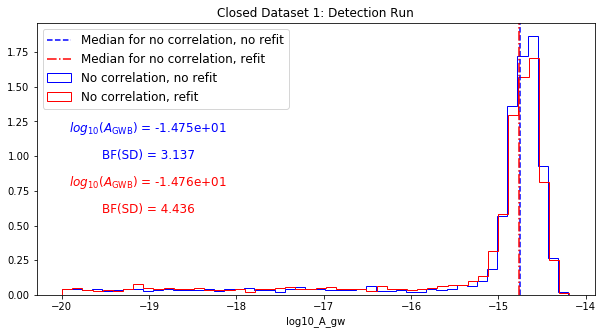

In [54]:
#Plot detection histogram on gwb for closed_1_1 and closed_1_2
log = True
plt.figure(figsize=(10,5))
plt.title('Closed Dataset 1: Detection Run')

if log == False:
    plt_chain_closed_1_1 = 10**chain_closed_1_1[burn_closed_1_1:,index_from_eof]
    plt_chain_closed_1_2 = 10**chain_closed_1_2[burn_closed_1_2:,index_from_eof]
    Amp_1_1 = r'$A_{\rm GWB}$ = '
    Amp_1_2 = r'$A_{\rm GWB}$ = '
else:
    plt_chain_closed_1_1 = chain_closed_1_1[burn_closed_1_1:,index_from_eof]
    plt_chain_closed_1_2 = chain_closed_1_2[burn_closed_1_2:,index_from_eof]
    Amp_1_1 = r'$log_{10}(A_{\rm GWB})$ = '
    Amp_1_2 = r'$log_{10}(A_{\rm GWB})$ = '

#Get median of GWB histogram
gwb_med_closed_1_1 = np.median(plt_chain_closed_1_1)
gwb_med_closed_1_2 = np.median(plt_chain_closed_1_2)
#Get avg and std dev of GWB histogram
gwb_mean_closed_1_1 = np.mean(plt_chain_closed_1_1)
gwb_mean_closed_1_2 = np.mean(plt_chain_closed_1_2)
gwb_sigma_closed_1_1 = np.std(plt_chain_closed_1_1)
gwb_sigma_closed_1_2 = np.std(plt_chain_closed_1_2)
#Get Bayes' Factor of run
Bae_1_1 = Bayes_fac(plt_chain_closed_1_1, ntol = 200, logAmin = min(plt_chain_closed_1_1), logAmax = max(plt_chain_closed_1_1))
Bae_1_2 = Bayes_fac(plt_chain_closed_1_2, ntol = 200, logAmin = min(plt_chain_closed_1_2), logAmax = max(plt_chain_closed_1_2))
#plot text
Amp_1_1 = Amp_1_1 + str(np.format_float_scientific(gwb_med_closed_1_1,precision = 3))
Amp_1_2 = Amp_1_2 + str(np.format_float_scientific(gwb_med_closed_1_2,precision = 3))
Bae_txt_1_1 = 'BF(SD) = ' + str(round(Bae_1_1[0],3))
Bae_txt_1_2 = 'BF(SD) = ' + str(round(Bae_1_2[0],3))
    
plt.hist(plt_chain_closed_1_1, bins = n_bins, density = True,histtype = 'step',label = 'No correlation, no refit',color='b')
plt.hist(plt_chain_closed_1_2, bins = n_bins, density = True,histtype = 'step',label = 'No correlation, refit',color='r')
plt.axvline(x=gwb_med_closed_1_1, linestyle = '--', color = 'b', label = 'Median for no correlation, no refit')
plt.axvline(x=gwb_med_closed_1_2, linestyle = '-.', color = 'r', label = 'Median for no correlation, refit')
#plt.axvspan(gwb_mean_closed_1_1-gwb_sigma_closed_1_1, gwb_mean_closed_1_1+gwb_sigma_closed_1_1, alpha=0.25, color='b')
#plt.axvspan(gwb_mean_closed_1_2-gwb_sigma_closed_1_2, gwb_mean_closed_1_2+gwb_sigma_closed_1_2, alpha=0.25, color='r')
plt.text(x = .2,y = .6,s=Amp_1_1,transform=plt.gca().transAxes,fontsize = textsize, horizontalalignment='center', color = 'b')
plt.text(x = .2,y = .4,s=Amp_1_2,transform=plt.gca().transAxes,fontsize = textsize, horizontalalignment='center', color = 'r')
plt.text(x = .2,y = .5,s=Bae_txt_1_1,transform=plt.gca().transAxes,fontsize = textsize, horizontalalignment='center', color = 'b')
plt.text(x = .2,y = .3,s=Bae_txt_1_2,transform=plt.gca().transAxes,fontsize = textsize, horizontalalignment='center', color = 'r')
plt.xlabel(pars[index_from_eof])
plt.legend(loc = 'upper left',prop={'size': textsize})
plt.show()

Upper Limit Run: LinearExp prior

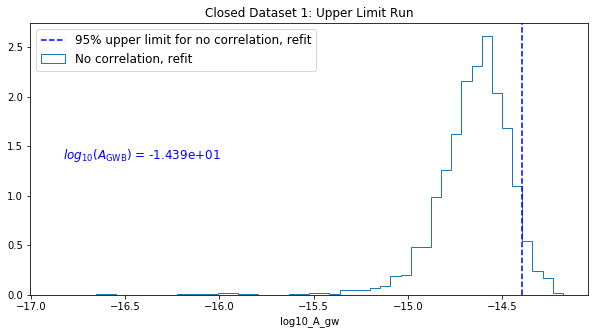

In [34]:
#Plot upper limit run closed_1_3
log = True
plt.figure(figsize=(10,5))
plt.title('Closed Dataset 1: Upper Limit Run')

if log == False:
    plt_chain_closed_1_3 = 10**chain_closed_1_3[burn_closed_1_3:,index_from_eof]
    Amp_1_3 = r'$A_{\rm GWB}$ = '
else:
    plt_chain_closed_1_3 = chain_closed_1_3[burn_closed_1_3:,index_from_eof]
    Amp_1_3 = r'$log_{10}(A_{\rm GWB})$ = '

n, bins, _ = plt.hist(plt_chain_closed_1_3, bins = n_bins, density = True,histtype = 'step',label = 'No correlation, refit')

upper_limit_closed_1_3 = Getupperlimit(n,bins,upper_limit)

Amp_1_3 = Amp_1_3 + str(np.format_float_scientific(upper_limit_closed_1_3,precision = 3))

plt.axvline(x=upper_limit_closed_1_3, linestyle = '--', color = 'b', label = '95% upper limit for no correlation, refit')
plt.text(x = .2,y = .5,s=Amp_1_3,transform=plt.gca().transAxes,fontsize = textsize, horizontalalignment='center', color = 'b')
plt.xlabel(pars[index_from_eof])
plt.legend(loc = 'upper left',prop={'size': textsize})
plt.show()

Detection Run: Uniform prior

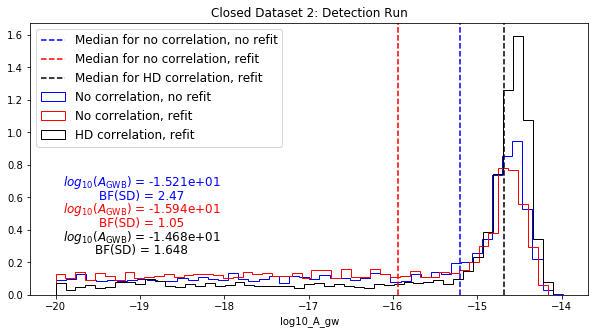

In [53]:
#Plot detection histogram on gwb for closed_2_1 and closed_2_3 and closed_2_4 (HD run)
log = True
plt.figure(figsize=(10,5))
plt.title('Closed Dataset 2: Detection Run')

if log == False:
    plt_chain_closed_2_1 = 10**chain_closed_2_1[burn_closed_2_1:,index_from_eof]
    plt_chain_closed_2_3 = 10**chain_closed_2_3[burn_closed_2_3:,index_from_eof]
    plt_chain_closed_2_4 = 10**chain_closed_2_4[burn_closed_2_4:,index_from_eof]
    Amp_2_1 = r'$A_{\rm GWB}$ = '
    Amp_2_3 = r'$A_{\rm GWB}$ = '
    Amp_2_4 = r'$A_{\rm GWB}$ = '
else:
    plt_chain_closed_2_1 = chain_closed_2_1[burn_closed_2_1:,index_from_eof]
    plt_chain_closed_2_3 = chain_closed_2_3[burn_closed_2_3:,index_from_eof]
    plt_chain_closed_2_4 = chain_closed_2_4[burn_closed_2_4:,index_from_eof]
    Amp_2_1 = r'$log_{10}(A_{\rm GWB})$ = '
    Amp_2_3 = r'$log_{10}(A_{\rm GWB})$ = '
    Amp_2_4 = r'$log_{10}(A_{\rm GWB})$ = '

#Get median of GWB histogram
gwb_med_closed_2_1 = np.median(plt_chain_closed_2_1)
gwb_med_closed_2_3 = np.median(plt_chain_closed_2_3)
gwb_med_closed_2_4 = np.median(plt_chain_closed_2_4)
#Get avg and std dev of GWB histogram
gwb_mean_closed_2_1 = np.mean(plt_chain_closed_2_1)
gwb_sigma_closed_2_1 = np.std(plt_chain_closed_2_1)
gwb_mean_closed_2_3 = np.mean(plt_chain_closed_2_3)
gwb_sigma_closed_2_3 = np.std(plt_chain_closed_2_3)
gwb_mean_closed_2_4 = np.mean(plt_chain_closed_2_4)
gwb_sigma_closed_2_4 = np.std(plt_chain_closed_2_4)
#Get Bayes' Factor of run
Bae_2_1 = Bayes_fac(plt_chain_closed_2_1, ntol = 200, logAmin = min(plt_chain_closed_2_1), logAmax = max(plt_chain_closed_2_1))
Bae_2_3 = Bayes_fac(plt_chain_closed_2_3, ntol = 200, logAmin = min(plt_chain_closed_2_3), logAmax = max(plt_chain_closed_2_3))
Bae_2_4 = Bayes_fac(plt_chain_closed_2_4, ntol = 200, logAmin = min(plt_chain_closed_2_4), logAmax = max(plt_chain_closed_2_4))
#plot text
Amp_2_1 = Amp_2_1 + str(np.format_float_scientific(gwb_med_closed_2_1,precision = 3))
Amp_2_3 = Amp_2_3 + str(np.format_float_scientific(gwb_med_closed_2_3,precision = 3))
Amp_2_4 = Amp_2_4 + str(np.format_float_scientific(gwb_med_closed_2_4,precision = 3))
Bae_txt_2_1 = 'BF(SD) = ' + str(round(Bae_2_1[0],3))
Bae_txt_2_3 = 'BF(SD) = ' + str(round(Bae_2_3[0],3))
Bae_txt_2_4 = 'BF(SD) = ' + str(round(Bae_2_4[0],3))

plt.hist(plt_chain_closed_2_1, bins = n_bins, density = True,histtype = 'step',label = 'No correlation, no refit',color='b')
plt.hist(plt_chain_closed_2_3, bins = n_bins, density = True,histtype = 'step',label = 'No correlation, refit',color='r')
plt.hist(plt_chain_closed_2_4, bins = n_bins, density = True,histtype = 'step',label = 'HD correlation, refit', color = 'k')
plt.axvline(x=gwb_med_closed_2_1, linestyle = '--', color = 'b', label = 'Median for no correlation, no refit')
plt.axvline(x=gwb_med_closed_2_3, linestyle = '--', color = 'r', label = 'Median for no correlation, refit')
plt.axvline(x=gwb_med_closed_2_4, linestyle = '--', color = 'k', label = 'Median for HD correlation, refit')
#plt.axvspan(gwb_mean_closed_2_1-gwb_sigma_closed_2_1, gwb_mean_closed_2_1+gwb_sigma_closed_2_1, alpha=0.25, color='b')
#plt.axvspan(gwb_mean_closed_2_3-gwb_sigma_closed_2_3, gwb_mean_closed_2_3+gwb_sigma_closed_2_3, alpha=0.25, color='r')
#plt.axvspan(gwb_mean_closed_2_4-gwb_sigma_closed_2_4, gwb_mean_closed_2_4+gwb_sigma_closed_2_4, alpha=0.25, color='k')
plt.text(x = .2,y=.4,s=Amp_2_1,transform=plt.gca().transAxes,fontsize = textsize, horizontalalignment='center', color = 'b')
plt.text(x = .2,y=.3,s=Amp_2_3,transform=plt.gca().transAxes,fontsize = textsize, horizontalalignment='center', color = 'r')
plt.text(x = .2,y=.2,s=Amp_2_4,transform=plt.gca().transAxes,fontsize = textsize, horizontalalignment='center', color = 'k')
plt.text(x = .2,y = .35,s=Bae_txt_2_1,transform=plt.gca().transAxes,fontsize = textsize, horizontalalignment='center', color = 'b')
plt.text(x = .2,y = .25,s=Bae_txt_2_3,transform=plt.gca().transAxes,fontsize = textsize, horizontalalignment='center', color = 'r')
plt.text(x = .2,y = .15,s=Bae_txt_2_4,transform=plt.gca().transAxes,fontsize = textsize, horizontalalignment='center', color = 'k')
plt.xlabel(pars[index_from_eof])
plt.legend(loc = 'upper left',prop={'size': textsize})
plt.show()

Upper Limit Run: LinearExp prior

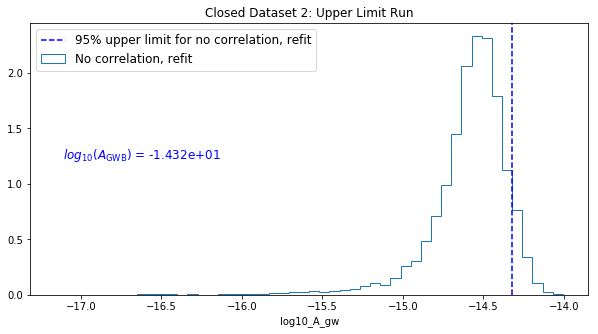

In [48]:
#Plot upper limit run closed_2_2
log = True
plt.figure(figsize=(10,5))
plt.title('Closed Dataset 2: Upper Limit Run')

if log == False:
    plt_chain_closed_2_2 = 10**chain_closed_2_2[burn_closed_2_2:,index_from_eof]
    Amp_2_2 = r'$A_{\rm GWB}$ = '
else:
    plt_chain_closed_2_2 = chain_closed_2_2[burn_closed_2_2:,index_from_eof]
    Amp_2_2 = r'$log_{10}(A_{\rm GWB})$ = '

n, bins, _ = plt.hist(plt_chain_closed_2_2, bins = n_bins, density = True,histtype = 'step',label = 'No correlation, refit')

upper_limit_closed_2_2 = Getupperlimit(n,bins,upper_limit)

Amp_2_2 = Amp_2_2 + str(np.format_float_scientific(upper_limit_closed_2_2,precision = 3))

plt.axvline(x=upper_limit_closed_2_2, linestyle = '--', color = 'b', label = '95% upper limit for no correlation, refit')
plt.text(x = .2,y = .5,s=Amp_2_2,transform=plt.gca().transAxes,fontsize = textsize, horizontalalignment='center', color = 'b')
plt.xlabel(pars[index_from_eof])
plt.legend(loc = 'upper left',prop={'size': textsize})
plt.show()

Detection Run: Uniform prior

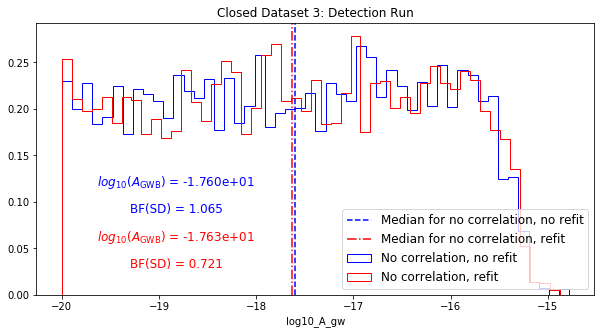

In [51]:
#Plot detection histogram on gwb for closed_3_1 and closed_3_2
log = True
plt.figure(figsize=(10,5))
plt.title('Closed Dataset 3: Detection Run')

if log == False:
    plt_chain_closed_3_1 = 10**chain_closed_3_1[burn_closed_3_1:,index_from_eof]
    plt_chain_closed_3_2 = 10**chain_closed_3_2[burn_closed_3_2:,index_from_eof]
    Amp_3_1 = r'$A_{\rm GWB}$ = '
    Amp_3_2 = r'$A_{\rm GWB}$ = '
else:
    plt_chain_closed_3_1 = chain_closed_3_1[burn_closed_3_1:,index_from_eof]
    plt_chain_closed_3_2 = chain_closed_3_2[burn_closed_3_2:,index_from_eof]
    Amp_3_1 = r'$log_{10}(A_{\rm GWB})$ = '
    Amp_3_2 = r'$log_{10}(A_{\rm GWB})$ = '

#Get median of GWB histogram
gwb_med_closed_3_1 = np.median(plt_chain_closed_3_1)
gwb_med_closed_3_2 = np.median(plt_chain_closed_3_2)
#Get avg and std dev of GWB histogram
gwb_mean_closed_3_1 = np.mean(plt_chain_closed_3_1)
gwb_mean_closed_3_2 = np.mean(plt_chain_closed_3_2)
gwb_sigma_closed_3_1 = np.std(plt_chain_closed_3_1)
gwb_sigma_closed_3_2 = np.std(plt_chain_closed_3_2)
#Get Bayes' Factor of run
Bae_3_1 = Bayes_fac(plt_chain_closed_3_1, ntol = 200, logAmin = min(plt_chain_closed_3_1), logAmax = max(plt_chain_closed_3_1))
Bae_3_2 = Bayes_fac(plt_chain_closed_3_2, ntol = 200, logAmin = min(plt_chain_closed_3_2), logAmax = max(plt_chain_closed_3_2))
#plot text
Amp_3_1 = Amp_3_1 + str(np.format_float_scientific(gwb_med_closed_3_1,precision = 3))
Amp_3_2 = Amp_3_2 + str(np.format_float_scientific(gwb_med_closed_3_2,precision = 3))
Bae_txt_3_1 = 'BF(SD) = ' + str(round(Bae_3_1[0],3))
Bae_txt_3_2 = 'BF(SD) = ' + str(round(Bae_3_2[0],3))

plt.hist(plt_chain_closed_3_1, bins = n_bins, density = True,histtype = 'step',label = 'No correlation, no refit', color='b')
plt.hist(plt_chain_closed_3_2, bins = n_bins, density = True,histtype = 'step',label = 'No correlation, refit', color='r')
plt.axvline(x=gwb_med_closed_3_1, linestyle = '--', color = 'b', label = 'Median for no correlation, no refit')
plt.axvline(x=gwb_med_closed_3_2, linestyle = '-.', color = 'r', label = 'Median for no correlation, refit')
#plt.axvspan(gwb_mean_closed_3_1-gwb_sigma_closed_3_1, gwb_mean_closed_3_1+gwb_sigma_closed_3_1, alpha=0.25, color='b')
#plt.axvspan(gwb_mean_closed_3_2-gwb_sigma_closed_3_2, gwb_mean_closed_3_2+gwb_sigma_closed_3_2, alpha=0.25, color='r')
plt.text(x = .25,y = .4,s=Amp_3_1,transform=plt.gca().transAxes,fontsize = textsize, horizontalalignment='center', color = 'b')
plt.text(x = .25,y = .2,s=Amp_3_2,transform=plt.gca().transAxes,fontsize = textsize, horizontalalignment='center', color = 'r')
plt.text(x = .25,y = .3,s=Bae_txt_3_1,transform=plt.gca().transAxes,fontsize = textsize, horizontalalignment='center', color = 'b')
plt.text(x = .25,y = .1,s=Bae_txt_3_2,transform=plt.gca().transAxes,fontsize = textsize, horizontalalignment='center', color = 'r')
plt.xlabel(pars[index_from_eof])
plt.legend(loc = 'lower right',prop={'size': textsize})
plt.show()

Upper Limit Run: LinearExp prior

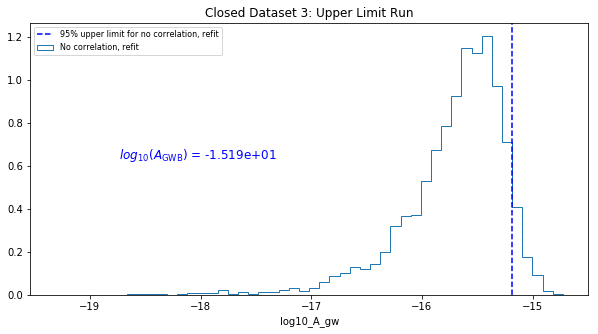

In [183]:
#Plot upper limit run closed_3_3
log = True
plt.figure(figsize=(10,5))
plt.title('Closed Dataset 3: Upper Limit Run')

if log == False:
    plt_chain_closed_3_3 = 10**chain_closed_3_3[burn_closed_3_3:,index_from_eof]
    Amp_3_3 = r'$A_{\rm GWB} 95%$ = '
else:
    plt_chain_closed_3_3 = chain_closed_3_3[burn_closed_3_3:,index_from_eof]
    Amp_3_3 = r'$log_{10}(A_{\rm GWB})$ = '

n, bins, _ = plt.hist(plt_chain_closed_3_3, bins = n_bins, density = True,histtype = 'step',label = 'No correlation, refit')

upper_limit_closed_3_3 = Getupperlimit(n,bins,upper_limit)

Amp_3_3 = Amp_3_3 + str(np.format_float_scientific(upper_limit_closed_3_3,precision = 3))

plt.axvline(x=upper_limit_closed_3_3, linestyle = '--', color = 'b', label = '95% upper limit for no correlation, refit')
plt.text(x = .3,y = .5,s=Amp_3_3,transform=plt.gca().transAxes,fontsize = textsize, horizontalalignment='center', color = 'b')
plt.xlabel(pars[index_from_eof])
plt.legend(loc = 'upper left',prop={'size': textsize})
plt.show()